Done


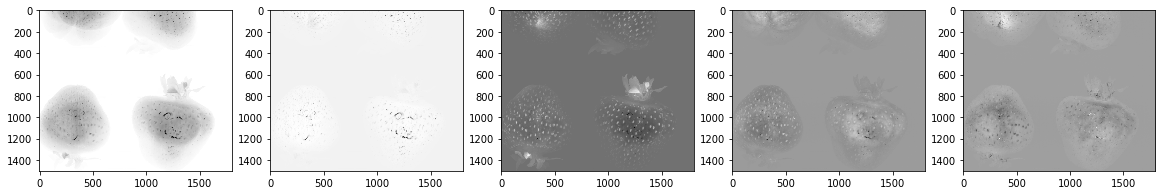

<Figure size 432x288 with 0 Axes>

In [2]:
import numpy as np
import spectral as sp
import matplotlib.pyplot as plt
import cv2
from functions import plotSpectrum, PCAreduce

BigPotatoes = [ "../Normalised/potatobig_b1_lowIG_VNIR_1800_SN00841_HSNR2_6000us_2020-10-09T155115_raw_rad_nn.hdr", 
                "../Normalised/potatobigpeeled_b1_lowIG_VNIR_1800_SN00841_HSNR2_6000us_2020-10-09T161707_raw_rad_nn.hdr", 
                "../Normalised/potatobighalf_b1_lowIG_VNIR_1800_SN00841_HSNR2_6000us_2020-10-09T164206_raw_rad_nn.hdr",
                "../Normalised/potatobig_b2_lowIG_VNIR_1800_SN00841_HSNR2_6000us_2020-10-09T165853_raw_rad_nn.hdr" ]

images = [ "../Strawberry/Normalised/STR_B1_12h_VNIR_1800_SN00841_HSNR2_9998us_2020-08-03T112003_raw_rad_nn.hdr" ]
 
margin = 1000
for img in images:
    
    imgCubeSmall = sp.open_image(img)
    N,M,BANDS = imgCubeSmall.shape
    subimgCube = np.clip(imgCubeSmall.read_subregion([margin+3000, N],[0, M]),0,1) # feil clip funksjon
    imgPC, eigenvalues = PCAreduce(subimgCube, 0.999)
    print("Done")
    plt.figure(figsize = (20,20))
    for i in range(len(eigenvalues)):
        plt.subplot(1,len(eigenvalues), i+1)
        plt.imshow(imgPC[:,:,i], cmap="gray")

    plt.figure()





In [ ]:
import numpy as np
import spectral as sp
import matplotlib.pyplot as plt
import cv2
from plots import plotSpectrum

#threshold = np.mean(imgBig8bit)
threshold = 7

def imhist(im):
    n, m = im.shape
    h = [0.0] * 256
    for i in range(n):
        for j in range(m):
            h[im[i, j]]+=1
    return np.array(h)

imgBig = sp.open_image("../Normalised/potatobig_b2_lowIG_VNIR_1800_SN00841_HSNR2_6000us_2020-10-09T165853_raw_rad_nn.hdr")

marginMin = 1100
marginMax = marginMin + 5000#1050
N,M,bands = imgBig.shape

imgBig = imgBig[marginMin:marginMax,:,:]

imgBig_pixel = imgBig[550, 900]

plotSpectrum(imgBig_pixel, xaxis='band')
plt.figure()


imgBigBand = imgBig[:,:,126]


#sp.imshow(imgBigBand, figsize = (300,30) ,cmap="gray")
#plt.figure()

imgBig8bit = (imgBigBand*256).astype('uint8')
imgBig8bitBinary = (imgBig8bit > threshold)
imgBigBool = np.zeros(imgBig8bit.shape, dtype='bool')
imgBigBool = (imgBig8bit > threshold)
print(imgBig8bit[550, 900])


blurred = cv2.GaussianBlur(imgBig8bit, (3, 3), 0)

thresh = cv2.threshold(blurred, np.mean(blurred) , 255, cv2.THRESH_BINARY)[1]  #thresholdblurred[150,900]
#thresh = cv2.threshold(blurred, 0, 1, cv2.THRESH_BINARY)[1]
#thresh = cv2.adaptiveThreshold(blurred, 1, cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY, 13, 2)


threshHist = imhist(imgBigBool)

plt.figure(figsize=(10, 8))
ax=plt.subplot(131)
ax.set_title("Histogram")
ax.plot(threshHist)

#sp.imshow(imgBigBool, figsize = (300,30), cmap="gray")
#plt.figure()
#sp.imshow(imgBig, figsize = (300,30) ,cmap="gray")

kernel = np.ones((3,3),np.uint8)
kernel[0,0] = 0
kernel[0,2] = 0
kernel[2,0] = 0
kernel[2,2] = 0

#kernel_flat = np.ones((3,3), np.uint8)
#kernel_flat[0, 0:] = 0
#kernel_flat[2, 0:] = 0


imgBigBool = np.float32(imgBigBool)
dilate = cv2.dilate(imgBigBool, kernel, iterations=5)
opening = cv2.erode(dilate, kernel, iterations=5)
opening = cv2.erode(opening, kernel_flat, iterations=75)
sp.imshow(opening, figsize = (300,30), cmap="gray")
plt.figure()


#opening = cv2.morphologyEx(dilate, cv2.MORPH_OPEN, kernel)

#edges = cv2.dilate(cv2.Canny(thresh, 0, 1), kernel, iterations = 1)


#sp.imshow(edges, figsize = (300,30), cmap="gray")
#plt.figure()



    # Draws contours
#cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)
#cv2.drawContours(imgBig8bit, cnt[-8:], -1, (255), 10)
#sp.imshow(imgBig8bit, figsize = (300,30), cmap="gray")
#plt.figure()




#sp.imshow(edges, figsize = (300,30), cmap="gray")
#plt.figure()

#kernel = np.ones((5,5),np.uint8)
#closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations = 5)

#sp.imshow(closing, figsize = (300,30), cmap="gray")



#laplacian = cv2.Laplacian(imgBigBand,cv2.CV_8U,ksize=9)
#plt.imshow(laplacian, figsize = (300,30) ,cmap="gray")
#plt.figure()

'\n        # num = number of potatoes\nfor i in range(1,K+1): # Tryggere å bruke K istendefor num, men num er kul\n    x,y,w,h = cv2.boundingRect(cnt[-i])\n    marg = 30\n    #potato = imgCube.read_subregion([-marg+margin+y,-marg+margin+y+h],[x+marg,x+w+marg])\n    cv2.rectangle(imgBand8bit,(x-marg, y-marg),(x+w+marg, y+h+marg),(255),3)\n\n\nsp.imshow(imgBand8bit, figsize = (300,30), cmap="gray")\nplt.figure()\n\n'

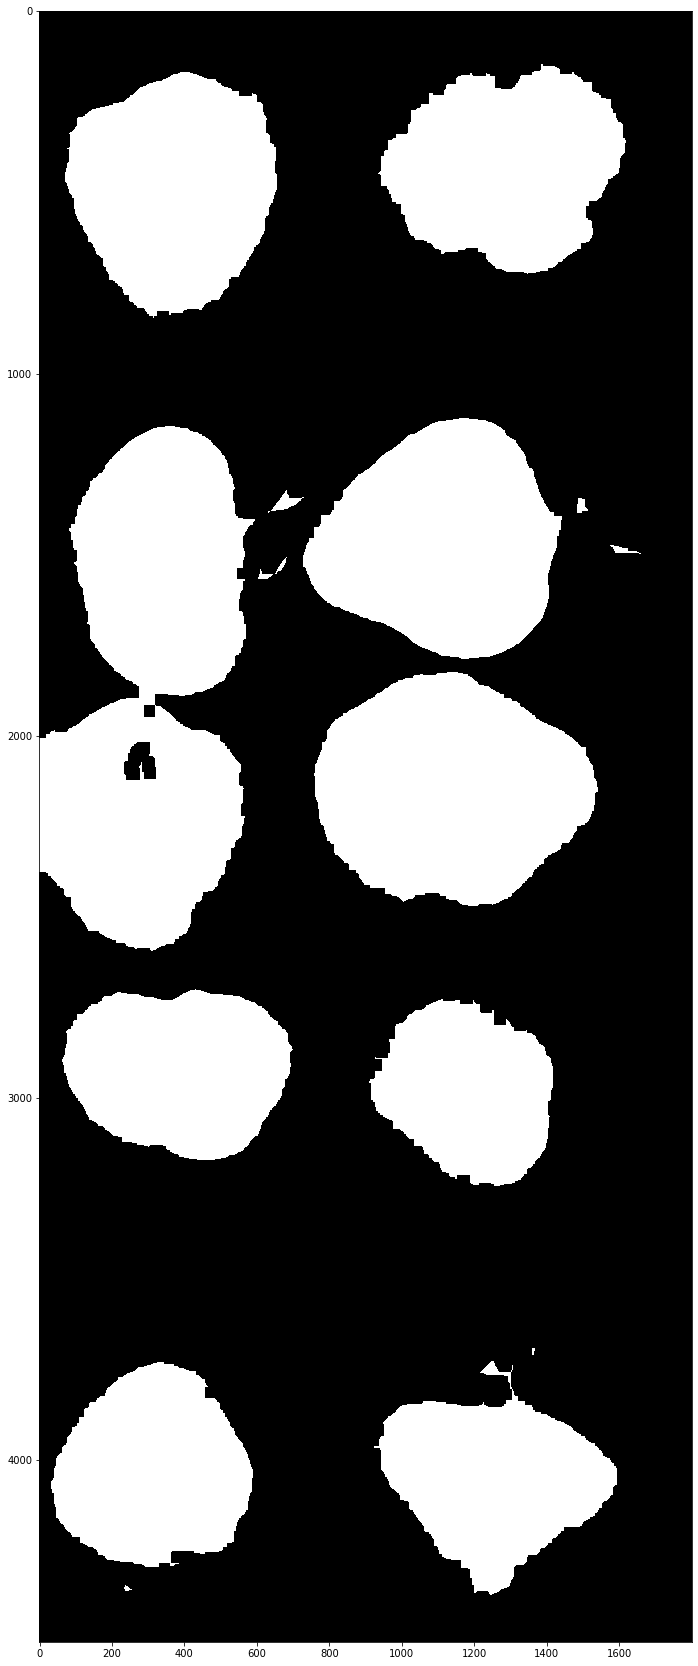

<Figure size 432x288 with 0 Axes>

In [15]:
import numpy as np
import spectral as sp
import matplotlib.pyplot as plt
import cv2
from functions import plotSpectrum, PCAreduce


#/Normalised/potatobigpeeled_b1_lowIG_VNIR_1800_SN00841_HSNR2_6000us_2020-10-09T161707_raw_rad_nn.hdr
#/Normalised/potatobig_b2_lowIG_VNIR_1800_SN00841_HSNR2_6000us_2020-10-09T165853_raw_rad_nn.hdr
#/Normalised/potatobighalf_b1_lowIG_VNIR_1800_SN00841_HSNR2_6000us_2020-10-09T164206_raw_rad_nn.hdr
#imgCube = sp.open_image("../Normalised/potatobig_b2_lowIG_VNIR_1800_SN00841_HSNR2_6000us_2020-10-09T165853_raw_rad_nn.hdr")
imgCube = sp.open_image("../Strawberry/Normalised/STR_B1_12h_VNIR_1800_SN00841_HSNR2_9998us_2020-08-03T112003_raw_rad_nn.hdr")


N,M,BANDS = imgCube.shape
K = 10         # number of strawberrys in img
band = 125    # threshold band
margin = 1000

#imgBand = (imgCube.read_band(140))[margin:,:]
#imgBand = imgCube.read_subregion([margin+3000, N],[0, M], band)
imgBand = imgCube.read_subregion([margin, N],[0, M], band)



imgBand8bit = (imgBand*255).astype('uint8')


    #Thresholding
thresh = cv2.threshold(imgBand8bit, 30, 255, cv2.THRESH_BINARY)[1] # + cv2.THRESH_OTSU
#sp.imshow(thresh, figsize = (300,30), cmap="gray")
#plt.figure()

kernel = np.ones((3,3),np.uint8)
erode = cv2.erode(thresh,kernel,iterations=15)


    # Contour
cnt = sorted(cv2.findContours(erode, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)

cv2.drawContours(erode, cnt[-K:], -1, (255), thickness=cv2.FILLED) 


sp.imshow(erode, figsize = (300,30), cmap="gray")
plt.figure()


    #Dilate
#kernel = np.ones((5,5),np.uint8)
#dilate = cv2.dilate(thresh,kernel,iterations=1)
#closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
#sp.imshow(closing, figsize = (300,30), cmap="gray")
#plt.figure()

#num, labels = cv2.connectedComponents(closing)
#print("Number of potatoes: ", num-1)



"""
        # num = number of potatoes
for i in range(1,K+1): # Tryggere å bruke K istendefor num, men num er kul
    x,y,w,h = cv2.boundingRect(cnt[-i])
    marg = 30
    #potato = imgCube.read_subregion([-marg+margin+y,-marg+margin+y+h],[x+marg,x+w+marg])
    cv2.rectangle(imgBand8bit,(x-marg, y-marg),(x+w+marg, y+h+marg),(255),3)


sp.imshow(imgBand8bit, figsize = (300,30), cmap="gray")
plt.figure()

"""


In [ ]:
    #One potato for experimentation
x,y,w,h = cv2.boundingRect(cnt[-1])
marg = 30
potato = (imgCube.read_subregion([margin-marg+y, margin+marg+y+h],[x-marg, x+w+marg]))#[:,:,100:]

#sp.imshow(potato[:,:,100], figsize=(100,10),cmap="gray")
plt.figure(figsize = (20,20))
plt.subplot(1, 2, 1)
plt.imshow(potato[:,:,100], cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(potato[:,:,180], cmap="gray")
plt.figure()


"""
PC = sp.principal_components(potato)
reduced = PC.reduce(fraction=0.999)
print("Eigenvalues: ",len(reduced.eigenvalues))

imgPC = reduced.transform(potato)

sp.imshow(imgPC[:,:,0], figsize=(100,10),cmap="gray")
"""

In [ ]:
import numpy as np
import spectral as sp
import matplotlib.pyplot as plt
import cv2
from plots import plotSpectrum

def imhist(im):
    n, m = im.shape
    h = [0.0] * 256
    for i in range(n):
        for j in range(m):
            h[im[i, j]]+=1
    return np.array(h)

# from cell above
img = potato

imgPixel = img[300, 250]

plotSpectrum(imgPixel, xaxis='band')
plt.figure()

img = img[:,:,126]
img8bit = (img*256).astype('uint8')

histogram = imhist(img8bit)

#plt.plot(histogram)
plt.figure()
threshold = (np.mean(img8bit))**1/2


imgBlur = img8bit

for i in range(100):
    imgBlur = cv2.GaussianBlur(imgBlur, (15,15), 0)

blurHist = imhist(imgBlur)
plt.figure()
plt.plot(blurHist)
#sp.imshow(imgBlur, figsize = (10,10) ,cmap="gray")


imgBool = np.zeros(img8bit.shape, dtype='bool')
imgBool = (img8bit > threshold)
sp.imshow(imgBool, figsize = (10,10) ,cmap="gray")

kernel = np.ones((3,3),np.uint8)
kernel[0,0] = 0
kernel[0,2] = 0
kernel[2,0] = 0
kernel[2,2] = 0

imgBool = np.float32(imgBool)
dilate = cv2.dilate(imgBool, kernel, iterations=5)
opening = cv2.erode(dilate, kernel, iterations=5)
sp.imshow(opening, figsize = (10,10), cmap="gray")
plt.figure()

